<a href="https://colab.research.google.com/github/Ghena-A/Stroke_Prediction/blob/main/Stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import matplotlib.pyplot as plt


Read the Dataset

In [54]:
data= pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
data.sample(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
1069,10367,Male,5.0,0,0,No,children,Rural,84.30,16.0,Unknown,0
2482,2822,Female,30.0,0,0,Yes,Private,Rural,72.49,25.8,never smoked,0
91,51169,Male,81.0,0,0,Yes,Private,Urban,72.81,26.3,never smoked,1
3265,11861,Male,61.0,0,0,Yes,Self-employed,Rural,81.96,29.9,never smoked,0
2769,59743,Male,64.0,0,1,Yes,Self-employed,Rural,69.28,38.6,formerly smoked,0
4684,49894,Female,78.0,1,1,Yes,Private,Rural,206.53,NaN,never smoked,0
3792,44259,Female,74.0,0,0,Yes,Private,Urban,130.37,26.3,Unknown,0
1739,33768,Female,16.0,0,0,No,Self-employed,Urban,88.85,27.1,Unknown,0
2992,52236,Female,60.0,0,0,Yes,Private,Rural,230.78,40.2,never smoked,0


analysis and understanding

In [55]:
data = data.drop('id', axis=1)
data.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [56]:
data.shape

(5110, 11)

In [57]:
data.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,0


Handling the Mising Valuo

In [58]:
data['bmi'].isnull().sum()

np.int64(201)

In [59]:
data['bmi'].fillna(data['bmi'].median(), inplace=True)


/tmp/ipython-input-3870670192.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].median(), inplace=True)


In [60]:
data['bmi'].isnull().sum()

np.int64(0)

Handaling the Duplicated

In [61]:
data.duplicated().sum()

np.int64(0)

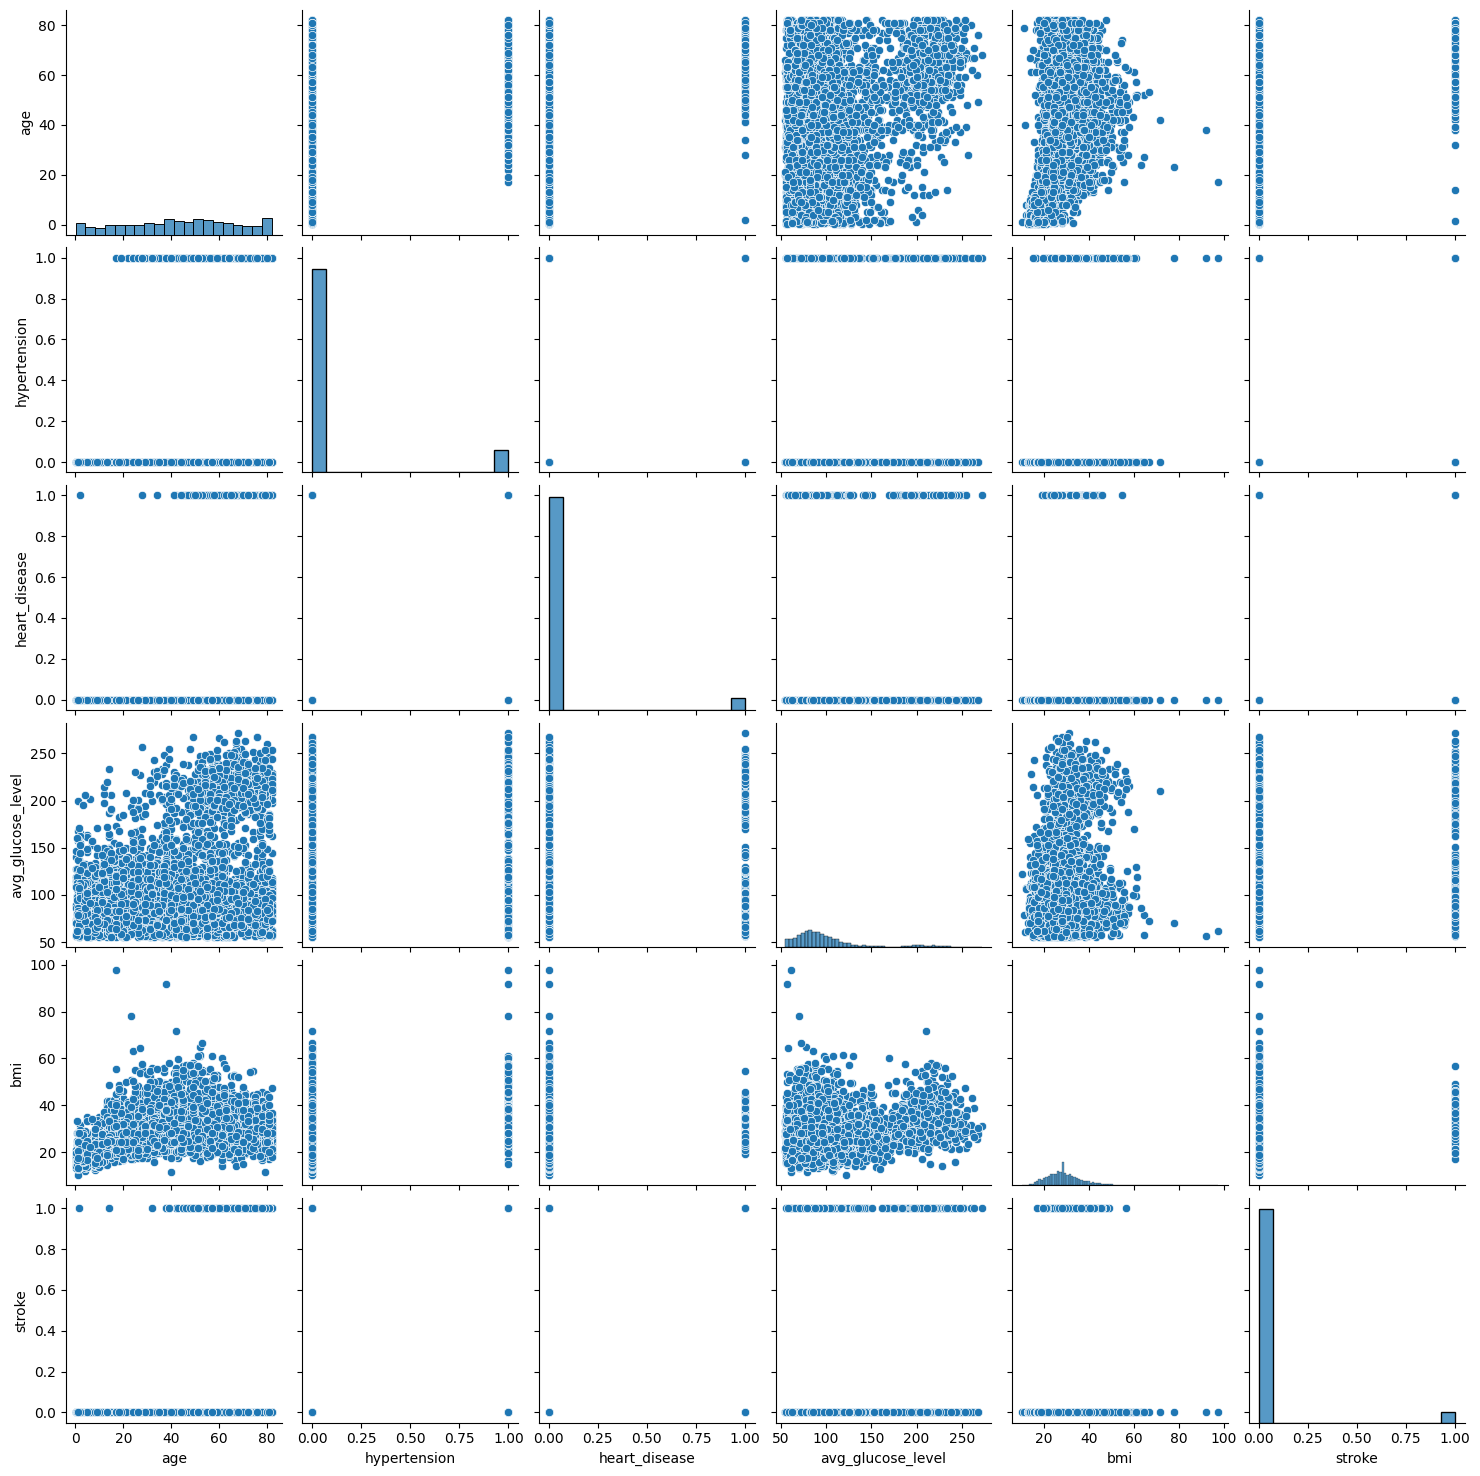

In [62]:
import seaborn as sns
sns.pairplot(data)
plt.show()

In [63]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Handaling the Text Data

In [64]:
data['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [65]:
data['Residence_type'].replace({'Urban': 0, 'Rural': 1}, inplace=True)

/tmp/ipython-input-2531399284.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Residence_type'].replace({'Urban': 0, 'Rural': 1}, inplace=True)
/tmp/ipython-input-2531399284.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Residence_type'].replace({'Urban': 0, 'Rural': 1}, inplace=

In [66]:
data['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [67]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [68]:
data=pd.get_dummies(data, columns=['work_type','smoking_status'],drop_first=True)

In [69]:
data['gender'].replace({'Male': 0, 'Female': 1, 'Other': 2}, inplace=True)

/tmp/ipython-input-1218554112.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['gender'].replace({'Male': 0, 'Female': 1, 'Other': 2}, inplace=True)
/tmp/ipython-input-1218554112.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['gender'].replace({'Male': 0, 'Female': 1, 'Other': 2}, 

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          5110 non-null   int64  
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   int64  
 3   heart_disease                   5110 non-null   int64  
 4   ever_married                    5110 non-null   object 
 5   Residence_type                  5110 non-null   int64  
 6   avg_glucose_level               5110 non-null   float64
 7   bmi                             5110 non-null   float64
 8   stroke                          5110 non-null   int64  
 9   work_type_Never_worked          5110 non-null   bool   
 10  work_type_Private               5110 non-null   bool   
 11  work_type_Self-employed         5110 non-null   bool   
 12  work_type_children              51

In [71]:
data['ever_married'] = data['ever_married'].map({'Yes':1, 'No':0})


the Corrlition matrix

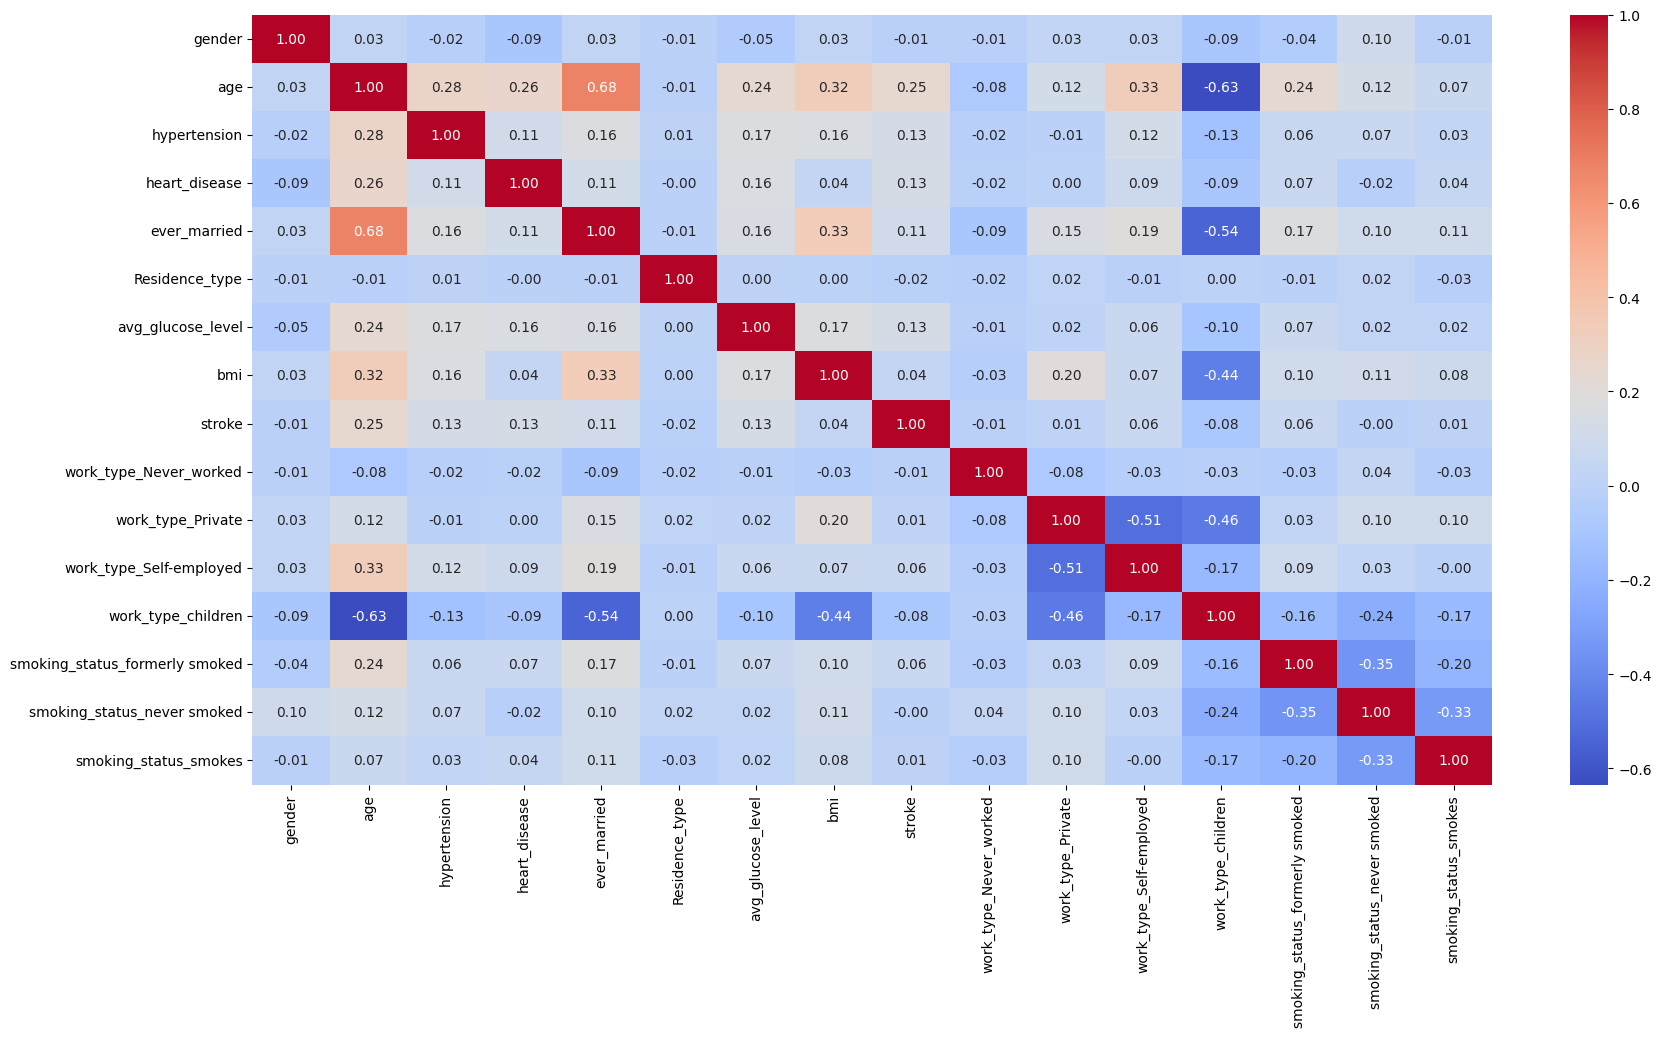

In [72]:
corr=data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


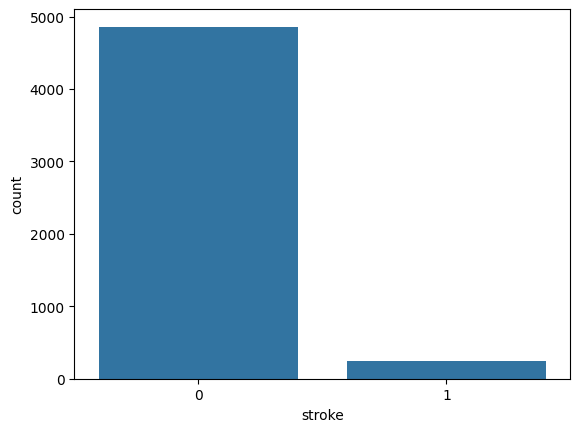

In [73]:
sns.countplot(x='stroke', data=data)
plt.show()

In [74]:
data['stroke'].value_counts()

,count
stroke,
0,4861
1,249


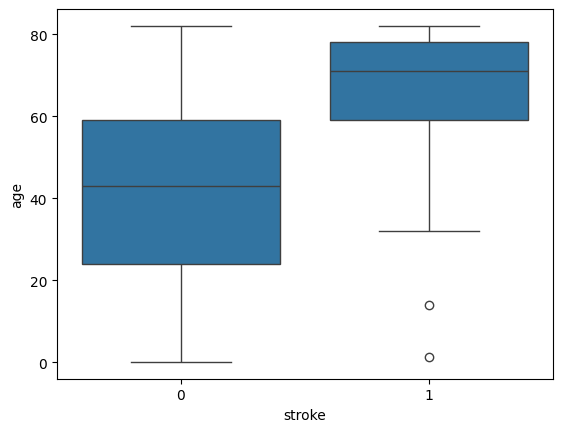

In [75]:
sns.boxplot(x='stroke', y='age', data=data)
plt.show()

see if  there outliers


In [76]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.586301,43.226614,0.097456,0.054012,0.656164,0.491977,106.147677,28.862035,0.048728
std,0.492941,22.612647,0.296607,0.226063,0.475034,0.499985,45.283560,7.699562,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,1.000000,45.000000,0.000000,0.000000,1.000000,0.000000,91.885000,28.100000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,1.000000,114.090000,32.800000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,1.000000,271.740000,97.600000,1.000000


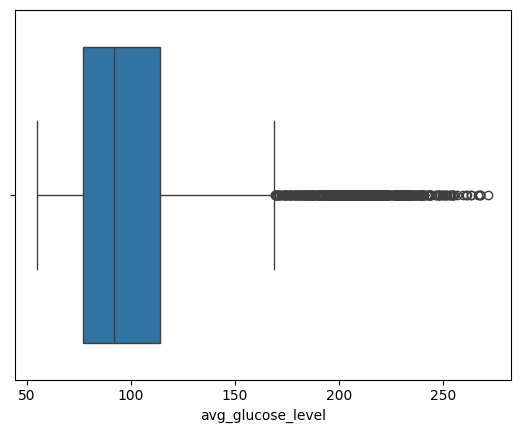

In [77]:
sns.boxplot(x=data['avg_glucose_level'])
plt.show()

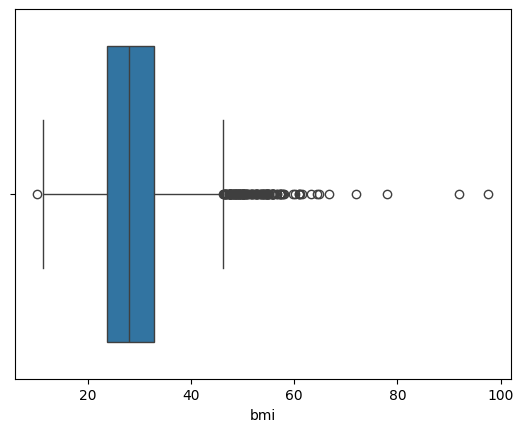

In [78]:
sns.boxplot(x=data['bmi'])
plt.show()

Handaling the Outliers


In [79]:
Q1 = data['bmi'].quantile(0.25)
Q3 = data['bmi'].quantile(0.75)
IQR = Q3 - Q1
Lower = Q1 - 1.5 * IQR
Upper = Q3 + 1.5 * IQR

data = data[(data['bmi'] >= Lower) & (data['bmi'] <= Upper)]
data.shape


(4984, 16)

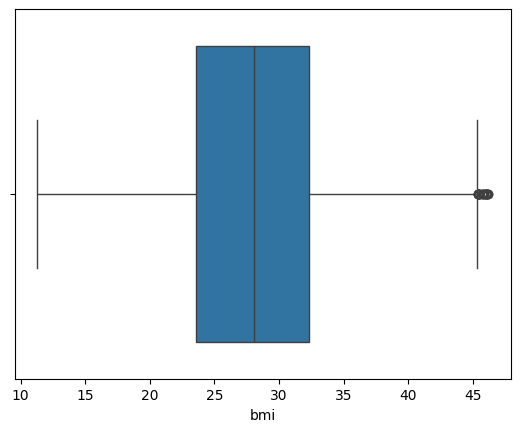

In [80]:
sns.boxplot(x=data['bmi'])
plt.show()

In [81]:
import numpy as np
data['avg_glucose_level']=np.log1p(data['avg_glucose_level'])

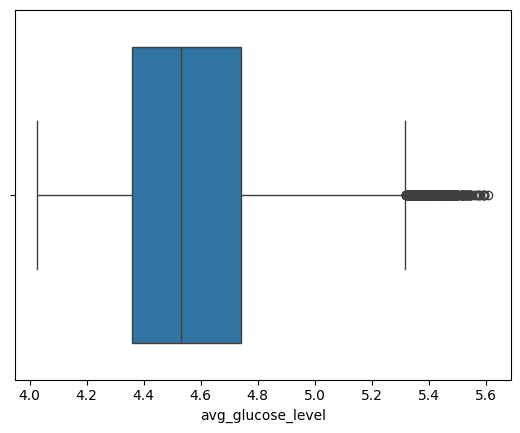

In [82]:
sns.boxplot(x=data['avg_glucose_level'])
plt.show()

In [83]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67.0,0,1,1,0,5.436731,36.6,1,False,True,False,False,True,False,False
1,1,61.0,0,0,1,1,5.314240,28.1,1,False,False,True,False,False,True,False
2,0,80.0,0,1,1,1,4.672081,32.5,1,False,True,False,False,False,True,False
3,1,49.0,0,0,1,0,5.148831,34.4,1,False,True,False,False,False,False,True
4,1,79.0,1,0,1,1,5.165471,24.0,1,False,False,True,False,False,True,False


In [84]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


speret the features

In [85]:
X = data.drop(columns=['stroke'])
y = data['stroke']

step for the model

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}


In [87]:
for name, model in models.items():
    pipe = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])

K-fold


In [88]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [89]:
scoring = {
    'roc_auc': 'roc_auc',
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score),
    'accuracy': 'accuracy'
}

In [90]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

for name, model in models.items():
    pipe = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])

    results = cross_validate(pipe, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    print(f"\n{name}")
    for k in scoring.keys():
        print(f"{k}: {results['test_'+k].mean():.3f}")


Logistic Regression
roc_auc: 0.837
f1: 0.235
precision: 0.138
recall: 0.801
accuracy: 0.743

Random Forest
roc_auc: 0.786
f1: 0.130
precision: 0.120
recall: 0.142
accuracy: 0.908

SVM
roc_auc: 0.758
f1: 0.189
precision: 0.119
recall: 0.455
accuracy: 0.806

XGBoost
roc_auc: 0.770
f1: 0.139
precision: 0.131
recall: 0.150
accuracy: 0.908


In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (3987, 15)
Testing set shape: (997, 15)


In [92]:
sm = SMOTE(random_state=42, sampling_strategy=0.5)  # 0.5 = يجعل الفئة الإيجابية نصف حجم الفئة السالبة
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("before SMOTE:", np.bincount(y_train))
print("after SMOTE:", np.bincount(y_train_res))

before SMOTE: [3790  197]
after SMOTE: [3790 1895]


In [93]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

In [94]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train_res)

LogisticRegression(max_iter=1000, random_state=42)

In [95]:
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

In [96]:
from sklearn.metrics import classification_report, roc_auc_score

print("Classification Report:\n", classification_report(y_test, y_pred, digits=3))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

Classification Report:
               precision    recall  f1-score   support

           0      0.966     0.908     0.936       948
           1      0.179     0.388     0.245        49

    accuracy                          0.883       997
   macro avg      0.573     0.648     0.591       997
weighted avg      0.928     0.883     0.902       997

ROC-AUC: 0.7790192026177558


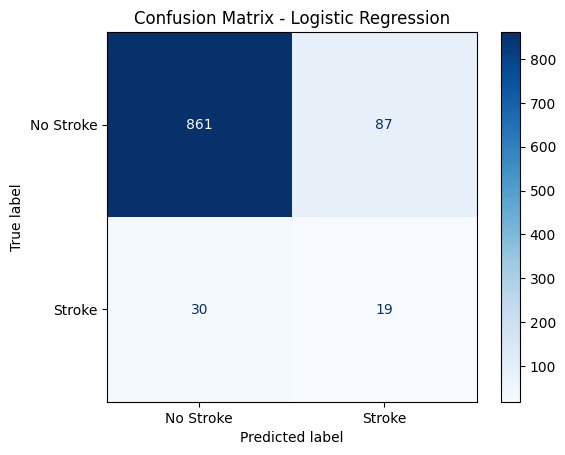

In [97]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Stroke', 'Stroke'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [98]:
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score
import numpy as np

prec, rec, thr = precision_recall_curve(y_test, y_proba)
f1s = 2 * (prec * rec) / (prec + rec + 1e-12)
best_idx = np.nanargmax(f1s)
best_thr = thr[best_idx]
print(f"Threshold  colcollet the best threshold F1: {best_thr:.3f}")


y_pred_adj = (y_proba >= best_thr).astype(int)
print("\n after the new thresholde")
print("Precision:", precision_score(y_test, y_pred_adj, zero_division=0))
print("Recall:", recall_score(y_test, y_pred_adj))
print("F1-score:", f1_score(y_test, y_pred_adj))

Threshold  colcollet the best threshold F1: 0.568

 after the new thresholde
Precision: 0.24
Recall: 0.3673469387755102
F1-score: 0.2903225806451613


/tmp/ipython-input-2802642638.py:10: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precisions * recalls) / (precisions + recalls)


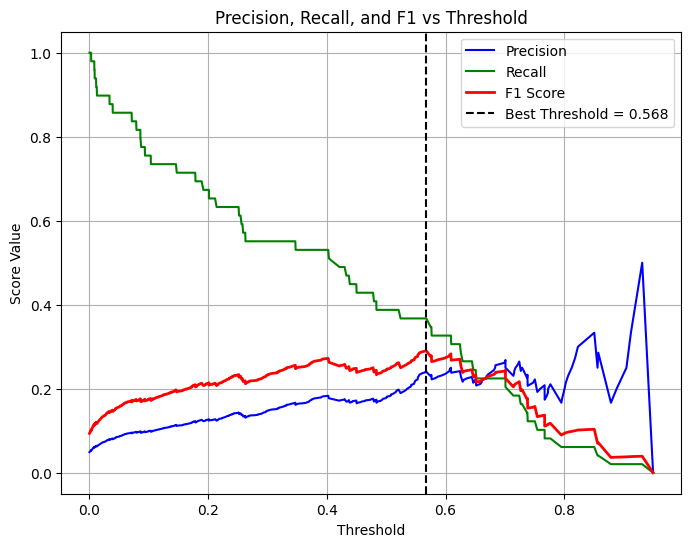

✅ collcoler the best threshold F1: 0.568
Precision : 0.240
Recall : 0.367
F1 Score : 0.290


In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score


# 1️⃣ Calculate the values ​​for all possible thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

# 2️⃣ We calculate F1 for each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
# (We ignore values ​​that are divisible by zero)
f1_scores = np.nan_to_num(f1_scores)

# 3️⃣ We draw the curves
plt.figure(figsize=(8,6))
plt.plot(thresholds, precisions[:-1], label='Precision', color='blue')
plt.plot(thresholds, recalls[:-1], label='Recall', color='green')
plt.plot(thresholds, f1_scores[:-1], label='F1 Score', color='red', linewidth=2)

# 4️⃣Add a line at the best threshold
best_threshold = thresholds[np.argmax(f1_scores)]
best_f1 = np.max(f1_scores)
plt.axvline(x=best_threshold, color='black', linestyle='--', label=f'Best Threshold = {best_threshold:.3f}')

# 5️⃣ Improve the appearance
plt.title('Precision, Recall, and F1 vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score Value')
plt.legend()
plt.grid(True)
plt.show()

# 6️⃣ We print the best threshold and its value
print(f"✅ collcoler the best threshold F1: {best_threshold:.3f}")
print(f"Precision : {precisions[np.argmax(f1_scores)]:.3f}")
print(f"Recall : {recalls[np.argmax(f1_scores)]:.3f}")
print(f"F1 Score : {best_f1:.3f}")


In [100]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score

joblib.dump(model, 'logistic_regression_model.joblib')
joblib.dump(scaler, 'scaler.joblib')
print("\n the model is save")


 the model is save


In [101]:
BEST_THRESHOLD = 0.7
joblib.dump(BEST_THRESHOLD, 'best_threshold.joblib')
print("Threshold saved successfully")


Threshold saved successfully


In [102]:
import gradio as gr
import joblib
import numpy as np
import pandas as pd

# Download the template and measurements
model = joblib.load('logistic_regression_model.joblib')
scaler = joblib.load('scaler.joblib')
BEST_THRESHOLD = joblib.load('best_threshold.joblib')

columns = [
    'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
    'Residence_type', 'avg_glucose_level', 'bmi',
    'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children',
    'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes'
]

def predict_stroke(age, gender, hypertension, heart_disease, ever_married,
                   work_type, residence_type, avg_glucose_level, bmi, smoking_status):
    try:
        #Create a dictionary with all columns valued at 0
        input_dict = {col: 0 for col in columns}

        # Core values
        input_dict['gender'] = 1 if gender == "Male" else 0
        input_dict['age'] = age
        input_dict['hypertension'] = 1 if hypertension == "Yes" else 0
        input_dict['heart_disease'] = 1 if heart_disease == "Yes" else 0
        input_dict['ever_married'] = 1 if ever_married == "Yes" else 0
        input_dict['Residence_type'] = 1 if residence_type == "Urban" else 0
        input_dict['avg_glucose_level'] = avg_glucose_level
        input_dict['bmi'] = bmi

        # work_type
        work_key = f'work_type_{work_type}'
        if work_key in input_dict:
            input_dict[work_key] = 1

        # smoking_status
        smoke_key = f'smoking_status_{smoking_status.lower()}'
        if smoke_key in input_dict:
            input_dict[smoke_key] = 1

        # Convert to DataFrame
        input_df = pd.DataFrame([input_dict])[columns]

        # Value scale
        X_scaled = scaler.transform(input_df)

        # Prediction
        prob = model.predict_proba(X_scaled)[0, 1]
        pred = 1 if prob >= BEST_THRESHOLD else 0

        # Message according to probability
        if prob < 0.3:
            msg = f"🟢 Very low risk({prob:.2f})"
            color = "green"
        elif prob < 0.6:
            msg = f"🟡 Medium risk ({prob:.2f})"
            color = "orange"
        else:
            msg = f"🔴 High risk ({prob:.2f})"
            color = "red"

        return f"<div style='font-size:20px; color:{color}; font-weight:bold;'>{msg}</div>"

    except Exception as e:
        return f"<div style='color:red;'>⚠️ An error occurred during the prediction: {e}</div>"


# Gradio final interface
interface = gr.Interface(
    fn=predict_stroke,
    inputs=[
        gr.Slider(18, 85, value=45, step=1, label="🎂 Age"),
        gr.Radio(["Male", "Female"], label="👩‍⚕️ Gender"),
        gr.Radio(["No", "Yes"], label="💉 Hypertension (هل يوجد ضغط؟)"),
        gr.Radio(["No", "Yes"], label="❤️ Heart Disease (هل يوجد مرض قلب؟)"),
        gr.Radio(["No", "Yes"], label="💍 Ever Married (هل متزوج؟)"),
        gr.Dropdown(["Private", "Self-employed", "Never_worked", "children"], label="🏢 Work Type"),
        gr.Dropdown(["Urban", "Rural"], label="🏠 Residence Type"),
        gr.Slider(60, 250, value=100, step=1, label="🩸 Average Glucose Level (mg/dL)"),
        gr.Slider(15, 45, value=28, step=0.1, label="⚖️ BMI (kg/m²)"),
        gr.Dropdown(["never smoked", "formerly smoked", "smokes", "Unknown"], label="🚬 Smoking Status")
    ],
    outputs=gr.HTML(label="🔍 Prediction Result"),
    title="🧠 Stroke Risk Prediction App",
    description="Interactive interface for assessing stroke risk using Logistic Regression.",
    theme="default",
)

interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://46919214239d1afa1a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
